In [1]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00


In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/ishwor_basyal/
  inflating: dataset/ishwor_basyal/1.jpg  
  inflating: dataset/ishwor_basyal/10.jpg  
  inflating: dataset/ishwor_basyal/2.jpg  
  inflating: dataset/ishwor_basyal/3.jpg  
  inflating: dataset/ishwor_basyal/4.jpg  
  inflating: dataset/ishwor_basyal/5.jpg  
  inflating: dataset/ishwor_basyal/6.jpg  
  inflating: dataset/ishwor_basyal/7.jpg  
  inflating: dataset/ishwor_basyal/9.jpg  
   creating: dataset/jenna_ortega/
  inflating: dataset/jenna_ortega/1.jpg  
  inflating: dataset/jenna_ortega/10.jpg  
  inflating: dataset/jenna_ortega/2.jpg  
  inflating: dataset/jenna_ortega/3.jpg  
  inflating: dataset/jenna_ortega/4.jpg  
  inflating: dataset/jenna_ortega/5.jfif  
  inflating: dataset/jenna_ortega/6.jpg  
  inflating: dataset/jenna_ortega/7.jpg  
  inflating: dataset/jenna_ortega/8.jpg  
  inflating: dataset/jenna_ortega/9.jpg  
   creating: dataset/prajwol_basyal/
  inflating: dataset/prajwol_basyal/1.

In [47]:
img=cv.imread('/content/dataset/prajwol_basyal/8.png')

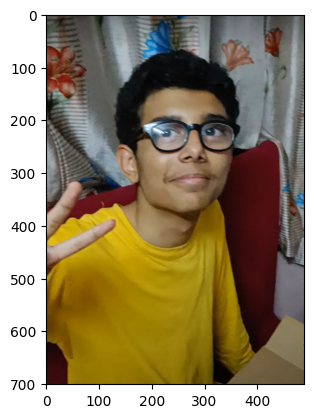

In [48]:
# Since, the openCV uses bgr format we have to convert it to rgb
rgbImg=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(rgbImg)

In [49]:
from mtcnn.mtcnn import MTCNN

# Using mtcnn(multi-task cascaded CNN) to detect the face boundary and preprocess the images
detector = MTCNN()
outputs = detector.detect_faces(img)
if not outputs:
  print("No face detected")

outputs

[{'box': [181, 145, 175, 225],
  'confidence': 0.996911346912384,
  'keypoints': {'nose': [282, 266],
   'mouth_right': [313, 313],
   'right_eye': [319, 225],
   'left_eye': [234, 226],
   'mouth_left': [237, 313]}}]

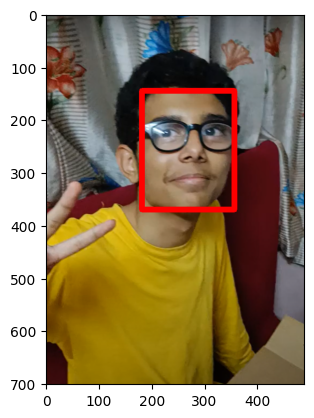

In [50]:
# We only need the box part to trim the face of the image
'''
 x,y___________________
    |                 |
    |                 |
    |_________________x+w,y+h
'''
x,y,w,h=outputs[0]['box']
start=(x,y)
end=(x+w,y+h)
color=(255,0,0) #RED
thickness=10
cv.rectangle(rgbImg, start,end,color,thickness)
plt.imshow(rgbImg)

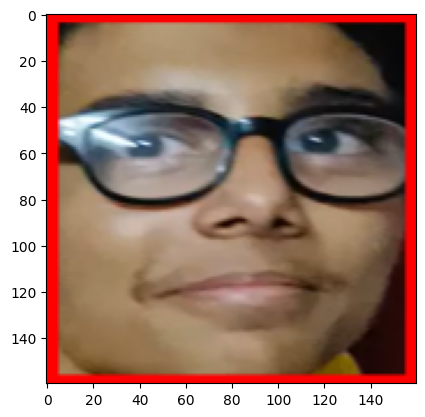

In [51]:
ironManFace = rgbImg[start[1]:end[1], start[0]:end[0]]
# plt.imshow(ironManFace)
ironManFace=cv.resize(ironManFace, (160,160))
plt.imshow(ironManFace)

In [9]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extractFace(self, filename):
        # Extract the face from a given image file.
        img = cv.imread(filename)
        if img is None:
            raise ValueError(f"Image {filename} could not be loaded.")
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        faces = self.detector.detect_faces(img)

        if not faces:
            raise ValueError(f"No face detected in {filename}")

        # Use the first detected face
        x, y, w, h = faces[0]['box']
        # x, y = abs(x), abs(y)  # Ensure positive values for cropping

        face = img[y:y + h, x:x + w]
        resizedFace = cv.resize(face, self.target_size)
        return resizedFace

    def loadFaces(self, dir):
        # Load all faces from a given directory.
        faces = []
        for imgName in os.listdir(dir):
            imgPath = os.path.join(dir, imgName)
            try:
                face = self.extractFace(imgPath)
                faces.append(face)
            except Exception as e:
                print(f"Skipping {imgPath}: {e}")
        return faces

    def loadImages(self):
        """Load faces and labels from subdirectories."""
        for subDir in os.listdir(self.directory):
            subDirPath = os.path.join(self.directory, subDir)
            if not os.path.isdir(subDirPath):
                continue

            faces = self.loadFaces(subDirPath)
            yLabels = [subDir for _ in range(len(faces))]
            print(f"Loaded {len(faces)} faces for class '{subDir}'")

            self.X.extend(faces)
            self.Y.extend(yLabels)

        return np.asarray(self.X), np.asarray(self.Y)

    def plotImages(self):
        """Plot the first 'num_images' faces."""
        plt.figure(figsize=(12, 16))
        for i in range(len(self.X)):
            ncolns=3
            nrows=len(self.Y)//ncolns + 1
            plt.subplot(nrows, ncolns, i + 1)
            plt.imshow(self.X[i])
            plt.title(self.Y[i])
            plt.axis('off')
        plt.show()

In [10]:
faceloading = FACELOADING("/content/dataset")
X, Y_labels = faceloading.loadImages()

Skipping /content/dataset/robert_downey/10.jfif: No face detected in /content/dataset/robert_downey/10.jfif
Loaded 9 faces for class 'robert_downey'
Loaded 10 faces for class 'taylor_swift'
Loaded 9 faces for class 'ishwor_basyal'
Loaded 10 faces for class 'prajwol_basyal'
Loaded 10 faces for class 'jenna_ortega'


In [30]:
# faceloading.plotImages()

In [12]:
# print(Y_labels)

In [13]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=ffce8137889ad3e1e05b03d15f2c76c319403f0de66ba9a43179450c51a836c3
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [14]:
from keras_facenet import FaceNet
embedder = FaceNet()

def getEmbedding(face_img):
  # Model uses float for accurate prediction
  face_img = face_img.astype('float32') # 3D(160x160x3)
  # The embeddings function takes 4 dimensions, the first one being batch-size
  # In this case the batch size is just the a single photo
  face_img = np.expand_dims(face_img, axis=0)
  # 4D (Nonex160x160x3)
  predictedEmbeddings= embedder.embeddings(face_img)
  return predictedEmbeddings[0] # 512D image (1x1x512)

In [15]:
# Test embedding
embedding = getEmbedding(ironManFace)
print(embedding.shape)
embedding
# 512 dimensional feature vector of the ironManFace

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
(512,)


array([ 0.03054701, -0.05895446,  0.04520301,  0.04013839,  0.04209882,
        0.04497186,  0.0622055 , -0.0788314 ,  0.02364197,  0.0090217 ,
        0.06415432, -0.00093871, -0.01716626,  0.01573518, -0.03195802,
        0.02006832,  0.013166  ,  0.06921878,  0.03136692, -0.00090706,
       -0.06938928, -0.05378614,  0.04290153, -0.00330312, -0.09601732,
        0.01159546, -0.0668835 , -0.05060887, -0.11327907, -0.03450493,
        0.00966526,  0.00269266, -0.03659482,  0.00233453, -0.02373123,
       -0.00565233,  0.02720181, -0.00139262, -0.04981695,  0.06899229,
        0.00066202,  0.0280799 ,  0.00070275,  0.049924  ,  0.04470527,
        0.00191474,  0.03145484,  0.11364591, -0.04731663, -0.01580584,
        0.01442025,  0.07080062,  0.00637748,  0.04571323, -0.04470976,
       -0.03692998,  0.03645448, -0.0544104 , -0.06690277,  0.01441821,
       -0.04151775,  0.0101633 ,  0.03950711, -0.01821942, -0.01703539,
       -0.04199914, -0.03523339, -0.01242698, -0.00941594, -0.00

In [16]:
embeddings=[]
for img in X:
  embeddings.append(getEmbedding(img))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(Y_labels)


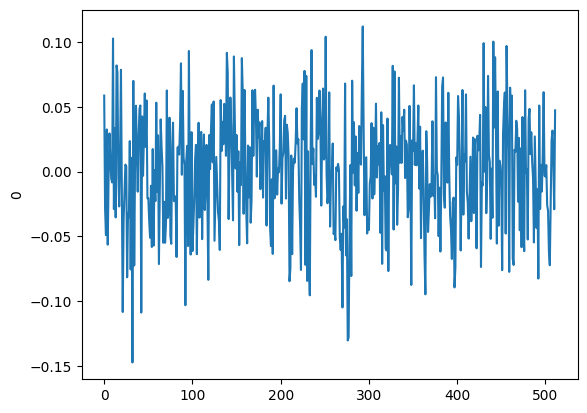

[3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1]


In [18]:
plt.plot(embeddings[20])
plt.ylabel(Y[20])
plt.show()
print(Y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(embeddings, Y, shuffle=True)

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [21]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [23]:
# Testing the model with a test image
t_im = cv.imread("/content/dataset/test.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [24]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = getEmbedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [25]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [26]:
# Testing the probabilites to account for 'Unknown' label
probs = model.predict_proba(test_im)
print(f'The probabilities are: {probs}\nThe encoded label is {[np.argmax(probs)]}')
ypreds

The probabilities are: [[0.74998917 0.03973442 0.10357933 0.05308496 0.05361212]]
The encoded label is [0]


array([0])

In [27]:
# Test the output is valid or not
print(encoder.inverse_transform(ypreds))
encoder.inverse_transform([np.argmax(probs)])

['ishwor_basyal']


array(['ishwor_basyal'], dtype='<U14')

In [28]:
# Save the model for use
from joblib import dump
dump(model, 'faceRecognitionModel.joblib')
dump((embeddings,Y_labels),'face_embeddings_with_labels.joblib')
# Y_labels

['face_embeddings_with_labels.joblib']